In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
df = pd.read_csv("data/Train.csv")

In [4]:
df.columns = [col.lower() for col in df.columns]

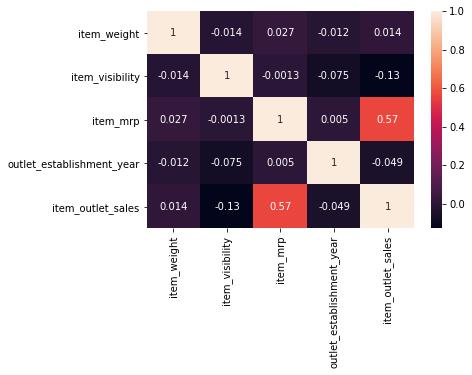

In [5]:
sns.heatmap(df.corr(), annot=True)

### The BigMart dataset has 12 columns where 2 (item_weight, outlet_size) of those have null values as you can see below

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
item_identifier              8523 non-null object
item_weight                  7060 non-null float64
item_fat_content             8523 non-null object
item_visibility              8523 non-null float64
item_type                    8523 non-null object
item_mrp                     8523 non-null float64
outlet_identifier            8523 non-null object
outlet_establishment_year    8523 non-null int64
outlet_size                  6113 non-null object
outlet_location_type         8523 non-null object
outlet_type                  8523 non-null object
item_outlet_sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### we dont need the item_identifier column. (its just an ID)

In [7]:
df.drop(columns=['item_identifier'], inplace=True)

### Dropping the null value rows is not an option because the dataset reduces to half of its size if we do so

In [8]:
df.dropna().shape

(4650, 11)

### The outlet_size column is categorical. so, replace the null values with the most frequent element (medium)

In [9]:
df['outlet_size'].value_counts()
df['outlet_size'].value_counts().idxmax()

Medium    2793
Small     2388
High       932
Name: outlet_size, dtype: int64

'Medium'

In [10]:
df['outlet_size'][df['outlet_size'].isnull()] = df['outlet_size'].value_counts().idxmax()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
item_weight                  7060 non-null float64
item_fat_content             8523 non-null object
item_visibility              8523 non-null float64
item_type                    8523 non-null object
item_mrp                     8523 non-null float64
outlet_identifier            8523 non-null object
outlet_establishment_year    8523 non-null int64
outlet_size                  8523 non-null object
outlet_location_type         8523 non-null object
outlet_type                  8523 non-null object
item_outlet_sales            8523 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


### fill the nan values in item_weight with the median value 

In [12]:
df['item_weight'].median()

12.6

In [13]:
df['item_weight'][df['item_weight'].isnull()] = df['item_weight'].median()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
item_weight                  8523 non-null float64
item_fat_content             8523 non-null object
item_visibility              8523 non-null float64
item_type                    8523 non-null object
item_mrp                     8523 non-null float64
outlet_identifier            8523 non-null object
outlet_establishment_year    8523 non-null int64
outlet_size                  8523 non-null object
outlet_location_type         8523 non-null object
outlet_type                  8523 non-null object
item_outlet_sales            8523 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


### we have successfully imputed all the null values. Now lets create dummy variables for the categorical columns

In [15]:
df = pd.get_dummies(df, drop_first=True)

In [16]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 40 columns):
item_weight                        8523 non-null float64
item_visibility                    8523 non-null float64
item_mrp                           8523 non-null float64
outlet_establishment_year          8523 non-null int64
item_outlet_sales                  8523 non-null float64
item_fat_content_Low Fat           8523 non-null uint8
item_fat_content_Regular           8523 non-null uint8
item_fat_content_low fat           8523 non-null uint8
item_fat_content_reg               8523 non-null uint8
item_type_Breads                   8523 non-null uint8
item_type_Breakfast                8523 non-null uint8
item_type_Canned                   8523 non-null uint8
item_type_Dairy                    8523 non-null uint8
item_type_Frozen Foods             8523 non-null uint8
item_type_Fruits and Vegetables    8523 non-null uint8
item_type_Hard Drinks              8523 non-null uint8
item_

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_Low Fat,item_fat_content_Regular,item_fat_content_low fat,item_fat_content_reg,item_type_Breads,...,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,outlet_size_Medium,outlet_size_Small,outlet_location_type_Tier 2,outlet_location_type_Tier 3,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [17]:
# just sanitizing the column names for easy typing

df.columns = [col.replace(' ', '_').lower() for col in df.columns]

In [18]:
feat = df.drop(columns=['item_outlet_sales'])
label = df['item_outlet_sales']

### split the data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.3)

### Now, lets standardize | normalize the data before fitting a model

In [20]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)